In [4]:
# USe: my-kernel-ldc
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline

import os

In [5]:
from ncar_jobqueue import NCARCluster


/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [6]:
hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]
env_list

['export HDF5_PLUGIN_PATH=/glade/work/haiyingx/H5Z-ZFP-PLUGIN-unbiased/plugin']

Start DASK...and connect to client

In [7]:
from dask.distributed import Client
from ncar_jobqueue import NCARCluster

#cluster = NCARCluster(project='NTDD0004', env_extra=['export HDF5_PLUGIN_PATH="/glade/work/haiyingx/hdf/h5pl-1.12.1-Linux/HDF_Group/HDF5/1.12.1/lib/plugin/"'])
cluster = NCARCluster(project='NTDD0004', env_extra=env_list)

# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster
client = Client(cluster)

In [10]:
col_ts_zfp_hdf5 = ldcpy.open_datasets("cam-fv",
                                      ["TS"],
                                 [   "/glade/p/cisl/asap/CAM_lossy_test_data_31/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                  "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",

                                 ],
                                 ["orig","zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p22", "zfp_p24"]
                                     )

dataset size in GB 0.16



In [11]:
ldcpy.compare_stats(
    col_ts_zfp_hdf5.isel(time=10),
    "TS",
    [
        "orig",
        "zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p22", "zfp_p24"     ]
)

/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


,orig,zfp_p4,zfp_p6,zfp_p8,zfp_p10,zfp_p12,zfp_p14,zfp_p16,zfp_p18,zfp_p20,zfp_p222,zfp_p24
mean,286.58,256,281.95,286.65,286.58,286.58,286.58,286.58,286.58,286.58,286.58,286.58
variance,501.42,0,450.5,507.61,501.85,501.59,501.47,501.42,501.42,501.42,501.42,501.42
standard deviation,22.392,0,21.225,22.53,22.402,22.396,22.393,22.392,22.392,22.392,22.392,22.392
min value,224.47,256,224,224,224,224.31,224.31,224.45,224.46,224.47,224.47,224.47
max value,310.34,256,320,312,308,310.81,310.37,310.35,310.34,310.34,310.34,310.34
probability positive,1,1,1,1,1,1,1,1,1,1,1,1
number of zeros,0,0,0,0,0,0,0,0,0,0,0,0
spatial autocorr - latitude,0.99554,nan,0.97775,0.99145,0.99458,0.99539,0.99552,0.99554,0.99554,0.99554,0.99554,0.99554
spatial autocorr - longitude,0.99824,nan,0.99211,0.99637,0.99765,0.99809,0.99822,0.99824,0.99824,0.99824,0.99824,0.99824
entropy estimate,0.4065,0.0015485,0.0029659,0.0097023,0.037629,0.10536,0.19155,0.27642,0.32446,0.35811,0.40302,0.40489


,zfp_p4,zfp_p6,zfp_p8,zfp_p10,zfp_p12,zfp_p14,zfp_p16,zfp_p18,zfp_p20,zfp_p222,zfp_p24
max abs diff,54.337,41.832,19.047,7.4225,2.101,0.54532,0.14459,0.035431,0.0089722,0.0024414,0.00054932
min abs diff,0.0011749,0.0011749,0.00012207,0,0,0,0,0,0,0,0
mean abs diff,32.338,8.5699,2.4137,0.82029,0.27831,0.08383,0.024358,0.006773,0.0017821,0.000445,0.00011125
mean squared diff,934.92,21.418,0.0056068,2.054e-07,4.2737e-08,2.8853e-06,3.5068e-08,7.316e-09,2.4173e-11,2.0364e-12,2.6877e-13
root mean squared diff,34.715,9.6432,2.9102,1.0974,0.37679,0.11006,0.031153,0.0085264,0.002236,0.00055987,0.00014042
normalized root mean squared diff,0.35163,0.10548,0.033165,0.012517,0.0042176,0.0012354,0.00034668,9.3904e-05,2.4485e-05,6.1308e-06,1.5374e-06
normalized max pointwise error,0.63279,0.33958,0.22181,0.080974,0.022921,0.0062297,0.0016839,0.00041261,0.00010449,2.8431e-05,6.3971e-06
pearson correlation coefficient,nan,0.92632,0.99198,0.99885,0.99987,0.99999,1,1,1,1,1
ks p-value,0,0,0,2.2659e-47,0.035383,0.99965,1,1,1,1,1
spatial relative error(% > 0.0001),99.978,99.877,99.351,97.578,92.227,76.085,32.42,0.092231,0,0,0


In [9]:
col_prect_zfp_hdf5 = ldcpy.open_datasets("cam-fv",
                                      ["PRECT"],
                                 [   "/glade/p/cisl/asap/CAM_lossy_test_data_31/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                  "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                 ],
                                 ["orig","zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p222", "zfp_p24"]
                                     )

dataset size in GB 1.94



In [10]:
ldcpy.compare_stats(
    col_prect_zfp_hdf5.isel(time=10),
    "PRECT",
    [
        "orig",
        "zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p222", "zfp_p24"     ]
)

,orig,zfp_p4,zfp_p6,zfp_p8,zfp_p10,zfp_p12,zfp_p14,zfp_p16,zfp_p18,zfp_p20,zfp_p222,zfp_p24
mean,3.8033e-08,3.8418e-08,3.7972e-08,3.8061e-08,3.8021e-08,3.8034e-08,3.8033e-08,3.8033e-08,3.8033e-08,3.8033e-08,3.8033e-08,3.8033e-08
variance,4.3362e-15,4.8062e-15,4.3624e-15,4.3568e-15,4.3342e-15,4.336e-15,4.3363e-15,4.3361e-15,4.3361e-15,4.3362e-15,4.3362e-15,4.3362e-15
standard deviation,6.5849e-08,6.9327e-08,6.6049e-08,6.6006e-08,6.5835e-08,6.5849e-08,6.585e-08,6.5849e-08,6.5849e-08,6.5849e-08,6.5849e-08,6.5849e-08
min value,-5.8031e-26,-2.3842e-07,-1.3411e-07,-4.6566e-08,-5.4715e-09,-7.858e-10,-1.9645e-10,-3.8199e-11,-1.1369e-11,-3.638e-12,-7.3896e-13,-1.9895e-13
max value,1.6003e-06,1.1921e-06,1.5795e-06,1.6019e-06,1.6093e-06,1.6021e-06,1.6006e-06,1.6004e-06,1.6003e-06,1.6003e-06,1.6003e-06,1.6003e-06
probability positive,0.99282,0.82825,0.90719,0.9456,0.96278,0.97208,0.97763,0.98119,0.98497,0.9862,0.98904,0.99023
number of zeros,392,5612,697,294,198,144,100,128,118,102,90,93
spatial autocorr - latitude,0.89526,0.85845,0.88411,0.89319,0.89502,0.89529,0.89525,0.89526,0.89526,0.89526,0.89526,0.89526
spatial autocorr - longitude,0.92898,0.88706,0.91584,0.92664,0.92877,0.92896,0.92898,0.92898,0.92898,0.92898,0.92898,0.92898
entropy estimate,0.53106,0.036244,0.16507,0.25694,0.30658,0.34213,0.37682,0.41457,0.45058,0.47815,0.5119,0.52187


,zfp_p4,zfp_p6,zfp_p8,zfp_p10,zfp_p12,zfp_p14,zfp_p16,zfp_p18,zfp_p20,zfp_p222,zfp_p24
max abs diff,6.5905e-07,3.0233e-07,8.5812e-08,1.8756e-08,5.466e-09,1.5223e-09,2.9871e-10,8.2466e-11,1.7167e-11,5.3433e-12,1.5348e-12
min abs diff,0,0,0,0,0,0,0,0,0,0,0
mean abs diff,1.4547e-08,5.4135e-09,1.6052e-09,4.0586e-10,1.0302e-10,2.5421e-11,6.3573e-12,1.5979e-12,3.9925e-13,9.9431e-14,2.5295e-14
mean squared diff,1.4817e-19,3.7782e-21,7.8577e-22,1.5166e-22,7.8351e-25,5.2917e-26,3.4203e-27,2.2477e-28,2.5226e-30,5.254e-33,8.7379e-32
root mean squared diff,3.4518e-08,1.2968e-08,3.8748e-09,9.6022e-10,2.4519e-10,6.0659e-11,1.4784e-11,3.8244e-12,9.4395e-13,2.3717e-13,6.0892e-14
normalized root mean squared diff,0.018535,0.0069411,0.002072,0.00051481,0.00013161,3.2555e-05,7.9597e-06,2.046e-06,5.0734e-07,1.2705e-07,3.258e-08
normalized max pointwise error,0.30121,0.18892,0.044067,0.01172,0.002342,0.00059951,0.00016036,5.1531e-05,1.0727e-05,3.3389e-06,9.5904e-07
pearson correlation coefficient,0.90497,0.98582,0.99874,0.99992,0.99999,1,1,1,1,1,1
ks p-value,0,7.9657e-177,2.543e-58,1.2972e-27,8.7453e-16,1.6299e-10,6.6161e-07,0.00022343,0.00080787,0.017356,0.057194
spatial relative error(% > 0.0001),99.278,99.253,99.125,98.736,96.998,90.247,66.649,29.38,14.433,8.2737,5.6876


In [4]:
col_ts_zfp = ldcpy.open_datasets("cam-fv",["TS"],
                                 ["/glade/work/abaker/zfp-stuff/zfp_hdf5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc", 
                                   "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_hdf_p16_c1.nc",
                                    "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_un_zfp_hdf_p16_c1.nc",
                                    "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_hdf_p16_c60.nc",
                                 "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_pc_p16_c60.nc",
                                "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_un_zfp_hdf_p16_c60.nc", 
                                 "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_pc_2D_p16_c60.nc",
                                "/glade/work/abaker/zfp-stuff/unbiased_zfp_hdf5/TS_un_zfp_p16_c1.nc",
                                "/glade/work/abaker/zfp-stuff/unbiased_zfp_hdf5/TS_un_zfp_p16_c60.nc",


                                 ], 
                                 ["orig", "zfp_hdf_c1","zfp_un_hdf_c1",
                                 "zfp_hdf_c60", 
                                  "pc_zfp_c60",
                                 "zfp_un_hdf_c60", "pc_zfp_c60_2d", "new_zfp_un_hdf_c1", "new_zfp_un_hdf_c60"])


dataset size in GB 0.12



In [5]:
ldcpy.compare_stats(
    col_ts_zfp.isel(time=10),
    "TS",
    [
        "orig",
        "zfp_hdf_c1", "new_zfp_un_hdf_c1","new_zfp_un_hdf_c60",
    ]
)

,orig,zfp_hdf_c1,new_zfp_un_hdf_c1,new_zfp_un_hdf_c60
mean,286.58,286.58,286.58,286.58
variance,501.42,501.47,501.42,501.42
standard deviation,22.392,22.393,22.392,22.392
min value,224.47,224.48,224.45,224.44
max value,310.34,310.34,310.35,310.24
probability positive,1,1,1,1
number of zeros,0,0,0,0
spatial autocorr - latitude,0.99554,0.99554,0.99554,0.99554
spatial autocorr - longitude,0.99824,0.99823,0.99824,0.99823
entropy estimate,0.4065,0.27788,0.27642,0.30374


,zfp_hdf_c1,new_zfp_un_hdf_c1,new_zfp_un_hdf_c60
max abs diff,0.18982,0.14459,0.28249
min abs diff,0,0,0
mean abs diff,0.028276,0.024358,0.043169
mean squared diff,2.5313e-05,3.5068e-08,2.4064e-10
root mean squared diff,0.036279,0.031153,0.056035
normalized root mean squared diff,0.00040358,0.00034668,0.00065651
normalized max pointwise error,0.0017183,0.0016839,0.0032897
pearson correlation coefficient,1,1,1
ks p-value,1,1,1
spatial relative error(% > 0.0001),38.739,32.42,58.626


In [6]:
ldcpy.compare_stats(
    col_ts_zfp.isel(time=10),
    "TS",
    [
        "zfp_hdf_c1","new_zfp_un_hdf_c1"
    ]
)

,zfp_hdf_c1,new_zfp_un_hdf_c1
mean,286.58,286.58
variance,501.47,501.42
standard deviation,22.393,22.392
min value,224.48,224.45
max value,310.34,310.35
probability positive,1,1
number of zeros,0,0
spatial autocorr - latitude,0.99554,0.99554
spatial autocorr - longitude,0.99823,0.99824
entropy estimate,0.27788,0.27642


,new_zfp_un_hdf_c1
max abs diff,0.25391
min abs diff,0
mean abs diff,0.03211
mean squared diff,2.7233e-05
root mean squared diff,0.043945
normalized root mean squared diff,0.00048995
normalized max pointwise error,0.0029574
pearson correlation coefficient,1
ks p-value,1
spatial relative error(% > 0.0001),48.436


/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


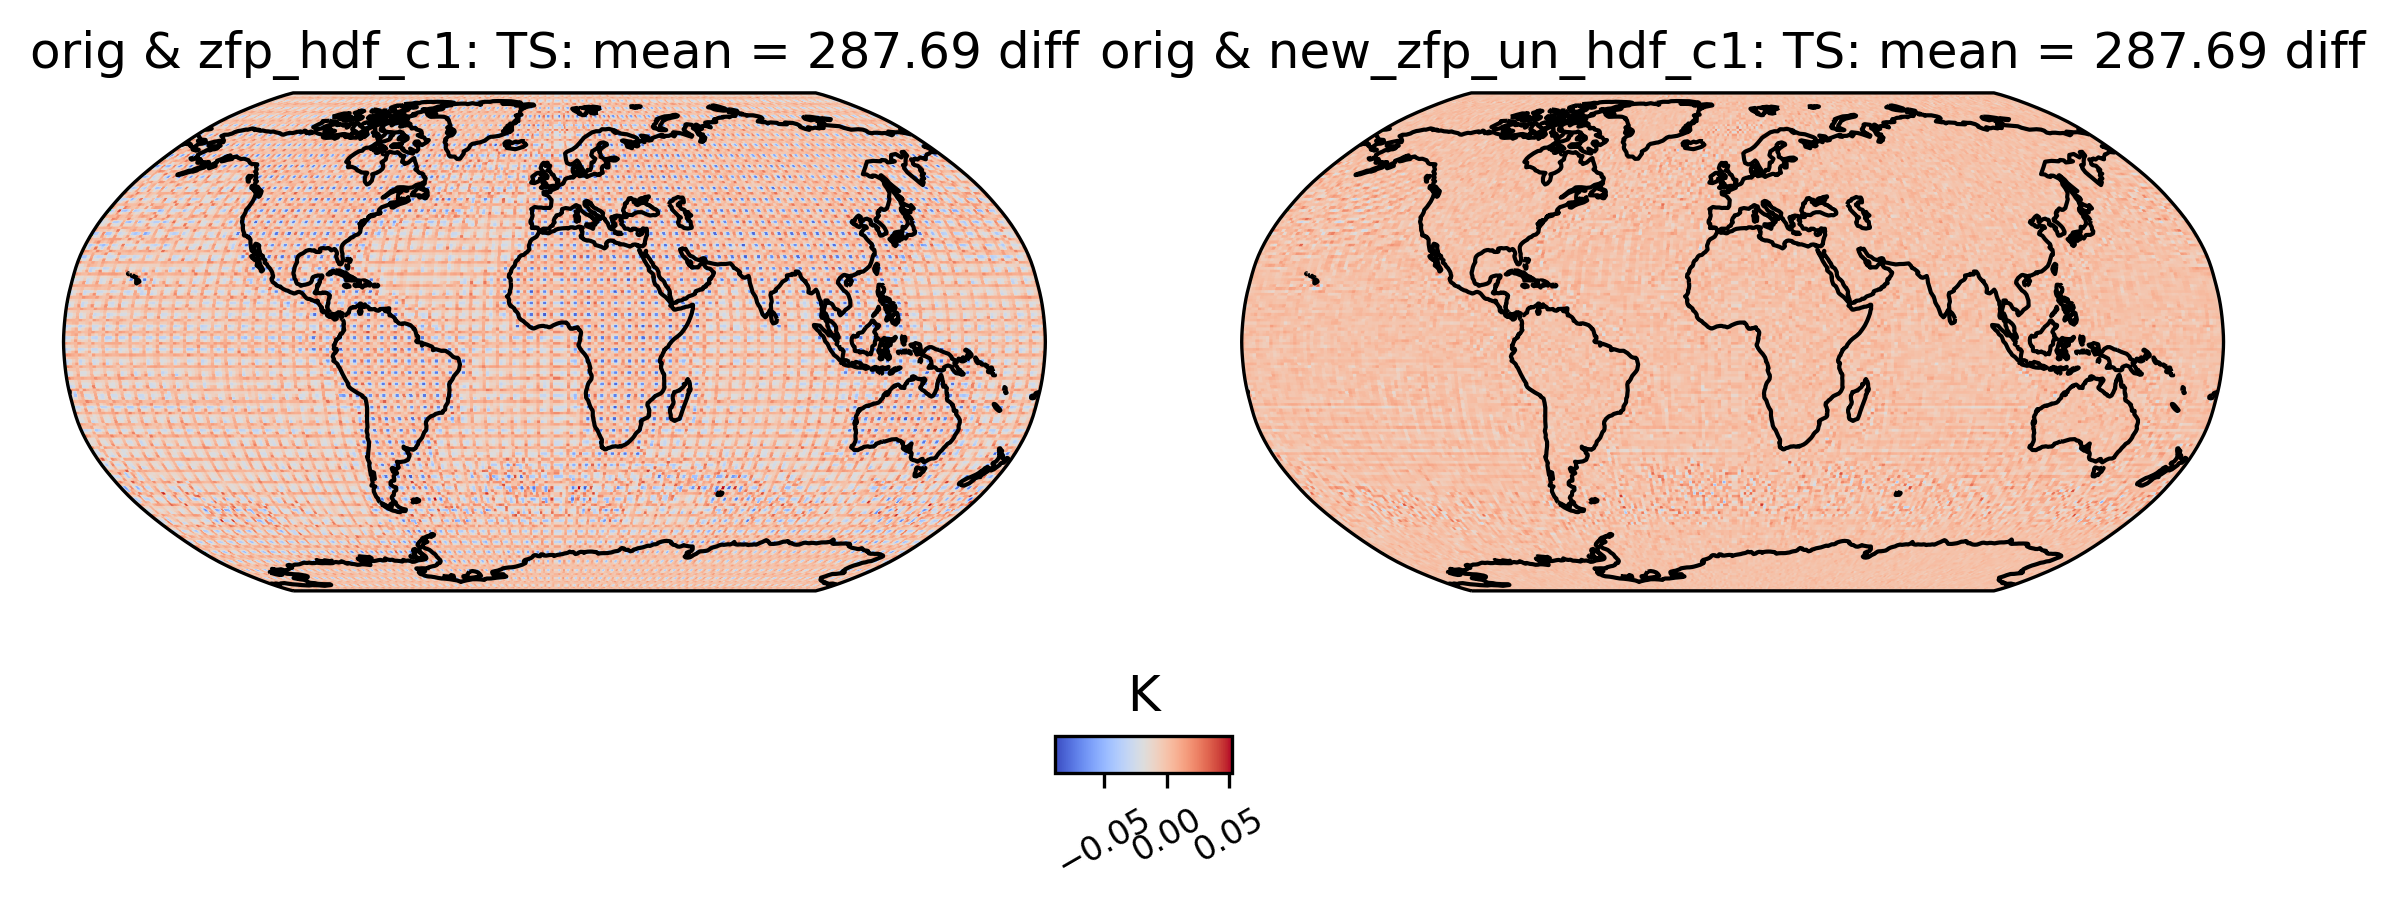

In [9]:
# diff between mean
ldcpy.plot(
    col_ts_zfp,
    "TS",
    sets=["orig", "zfp_hdf_c1", "new_zfp_un_hdf_c1"],
    calc="mean",
    calc_type="diff",
)

/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/glade/work/abaker/conda-envs/my-npl-ldc/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


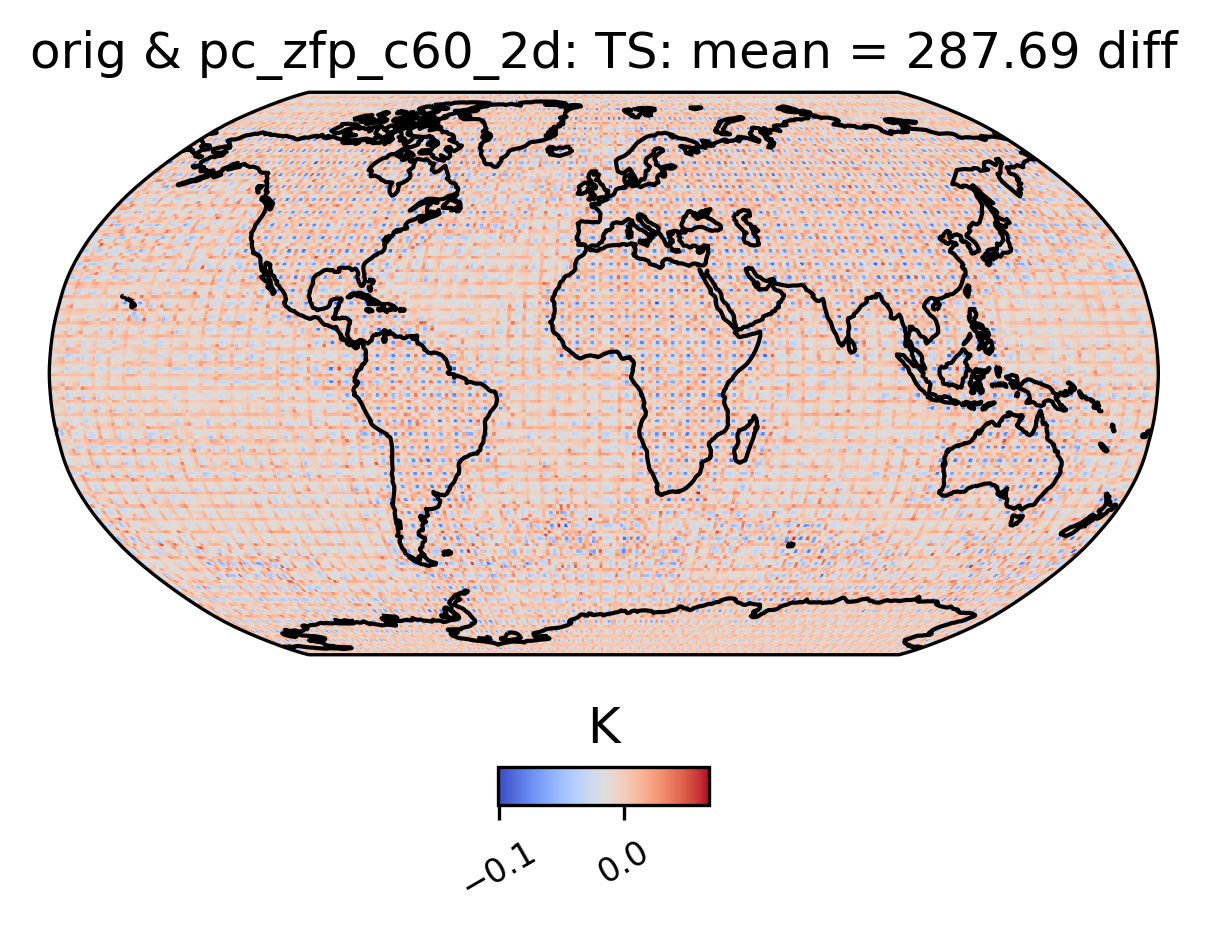

In [10]:
# diff between mean
ldcpy.plot(
    col_ts_zfp,
    "TS",
    sets=["orig", "pc_zfp_c60_2d"],
    calc="mean",
    calc_type="diff",
)

In [ ]:
# Disconnect when finished
cluster.close()
client.close()